In [46]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [47]:
df = pd.read_excel("C:\\Users\\user\\Desktop\\CNAM\\Extraction_IJ\\Extraction_IJ_hebdo_UNIV_LYON_Compte U.xlsx", sheet_name='Extraction hebdomadaire 1')
df2 = pd.read_excel("C:\\Users\\user\\Desktop\\CNAM\\Extraction_IJ\\Extraction_IJ_hebdo_UNIV_LYON_Compte U.xlsx", sheet_name='Extraction hebdomadaire 2')

In [48]:
result_df = pd.concat([df, df2], axis=0)

In [49]:
resultat_groupby = result_df.groupby(['Caisse'])['Délai après réception de la déclaration de salaire'].mean().reset_index()

In [50]:
result_df.head()

,Application de traitement,Périodicité,Caisse,Période début,Période fin,Risque,Injecteur de la déclaration de salaire,Destinataire du règlement,COVID,Nombre 1ère IJ,Délai après réception de la déclaration de salaire,Nombre DSN,Nombre DSIJ,Nombre papier,Code semaine
0,PROGRES TS,Hebdomadaire,11,2021-01-04,2021-01-10,MALADIE,Non déterminé,N : HORS SUBRO,NON,682,35.441349,ND,ND,ND,202101
1,PROGRES TS,Hebdomadaire,11,2021-01-04,2021-01-10,MALADIE,Non déterminé,N : HORS SUBRO,OUI,102,38.303922,ND,ND,ND,202101
2,PROGRES TS,Hebdomadaire,11,2021-01-04,2021-01-10,MALADIE,Non déterminé,O : SUBRO,NON,442,37.821267,ND,ND,ND,202101
3,PROGRES TS,Hebdomadaire,11,2021-01-04,2021-01-10,MALADIE,Non déterminé,O : SUBRO,OUI,78,44.743590,ND,ND,ND,202101
4,PROGRES TS,Hebdomadaire,11,2021-01-04,2021-01-10,AT,Non déterminé,N : HORS SUBRO,NON,115,33.582609,ND,ND,ND,202101


In [51]:
df_tx = pd.read_excel("C:\\Users\\user\\Desktop\\CNAM\\Projet 2_IJ et front_indicateurs V3_2\\Projet 2_IJ et front_indicateurs V3_2.xlsx", sheet_name='Tx itération multicanal',skiprows=range(1, 21),header=1)

In [52]:
df_tx.head()

,Code indicateur,Type de période,Période,Num organisme,Txt organisme,Libellé organisme,Axe 1,Axe 2,Axe 3,Axe 4,Axe 5,Mesure 1,Mesure 2,Mesure 3
0,Itérations,M,202201,141,CP141,141-Caen,Tous Canaux Entrant,NaN,NaN,NaN,NaN,NaN,NaN,4198
1,Itérations,M,202201,202,CP202,202-Bastia,Tous Canaux Entrant,NaN,NaN,NaN,NaN,NaN,NaN,1486
2,Itérations,M,202201,301,CP301,301-Nîmes,Tous Canaux Entrant,NaN,NaN,NaN,NaN,NaN,NaN,5649
3,Itérations,M,202201,342,CP342,342-Hérault,Tous Canaux Entrant,NaN,NaN,NaN,NaN,NaN,NaN,9713
4,Itérations,M,202201,361,CP361,361-Châteauroux,Tous Canaux Entrant,NaN,NaN,NaN,NaN,NaN,NaN,1159


In [53]:
resultat_groupby2 = df_tx.groupby(['Num organisme'])['Mesure 3'].mean().reset_index()

In [54]:
result_join = pd.merge(resultat_groupby, resultat_groupby2, left_on='Caisse', right_on='Num organisme', how='left')
# Drop the duplicate 'Num organisme' column if needed
result_join = result_join.drop(columns='Num organisme')
result_join = result_join.rename(columns={'Mesure 3': 'Solicitation front'})

In [55]:
result_join.head()

,Caisse,Délai après réception de la déclaration de salaire,Solicitation front
0,11,37.568768,2621.035714
1,21,31.938095,1407.202381
2,31,30.836831,847.297619
3,41,33.427732,557.809524
4,51,30.456475,403.976190


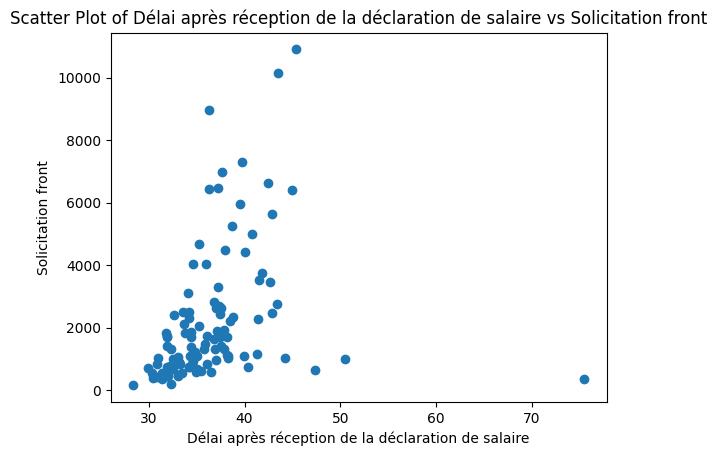

In [56]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(result_join['Délai après réception de la déclaration de salaire'], result_join['Solicitation front'])
plt.title('Scatter Plot of Délai après réception de la déclaration de salaire vs Solicitation front')
plt.xlabel('Délai après réception de la déclaration de salaire')
plt.ylabel('Solicitation front')
plt.show()
